In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import json
%matplotlib inline

In [2]:
# This might cause issues with your OS and installations of shapely, geos, and proj. 
# Try re-installing anaconda, and then previously mentioned dependencies. Then install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Read the data

In [3]:
modal_profiles = pd.read_csv('./output/single_modal_profile.csv', index_col=0)

In [4]:
line_metadata =  pd.read_csv('./data/line_metadata.csv')
line_metadata = line_metadata.drop(columns='linenum')

In [5]:
# Load conversion guide
with open('./data/conversion_guide.json') as f:
  conversion_guide = json.load(f)

In [6]:
ea = pd.read_csv('./data/ea_cantomtericsmodalprofiles_socialstrain.csv', index_col=0, na_values='NaN', keep_default_na=True).dropna()

## Font Manager

In [7]:
import matplotlib.font_manager

weights = ['ultralight', 'light', 'normal', 'regular', 'book', 'medium', 
           'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 
           'extra bold', 'black']

print('weight'+6*' ', 'file name', '\n'+70*'-')
for weight in weights:
    fprops = matplotlib.font_manager.FontProperties(family='Roboto', 
                                                    weight=weight)
    print(weight+(12-len(weight))*' ', matplotlib.font_manager.findfont(fprops))

weight       file name 
----------------------------------------------------------------------
ultralight   /Library/Fonts/Roboto-Thin.ttf
light        /Library/Fonts/Roboto-Thin.ttf
normal       /Library/Fonts/Roboto-Regular.ttf
regular      /Library/Fonts/Roboto-Regular.ttf
book         /Library/Fonts/Roboto-Regular.ttf
medium       /Library/Fonts/Roboto-Medium.ttf
roman        /Library/Fonts/Roboto-Medium.ttf
semibold     /Library/Fonts/Roboto-Bold.ttf
demibold     /Library/Fonts/Roboto-Bold.ttf
demi         /Library/Fonts/Roboto-Bold.ttf
bold         /Library/Fonts/Roboto-Bold.ttf
heavy        /Library/Fonts/Roboto-Bold.ttf
extra bold   /Library/Fonts/Roboto-Bold.ttf
black        /Library/Fonts/Roboto-Black.ttf


# Plot the data

## Plot EA Data- Embellishment

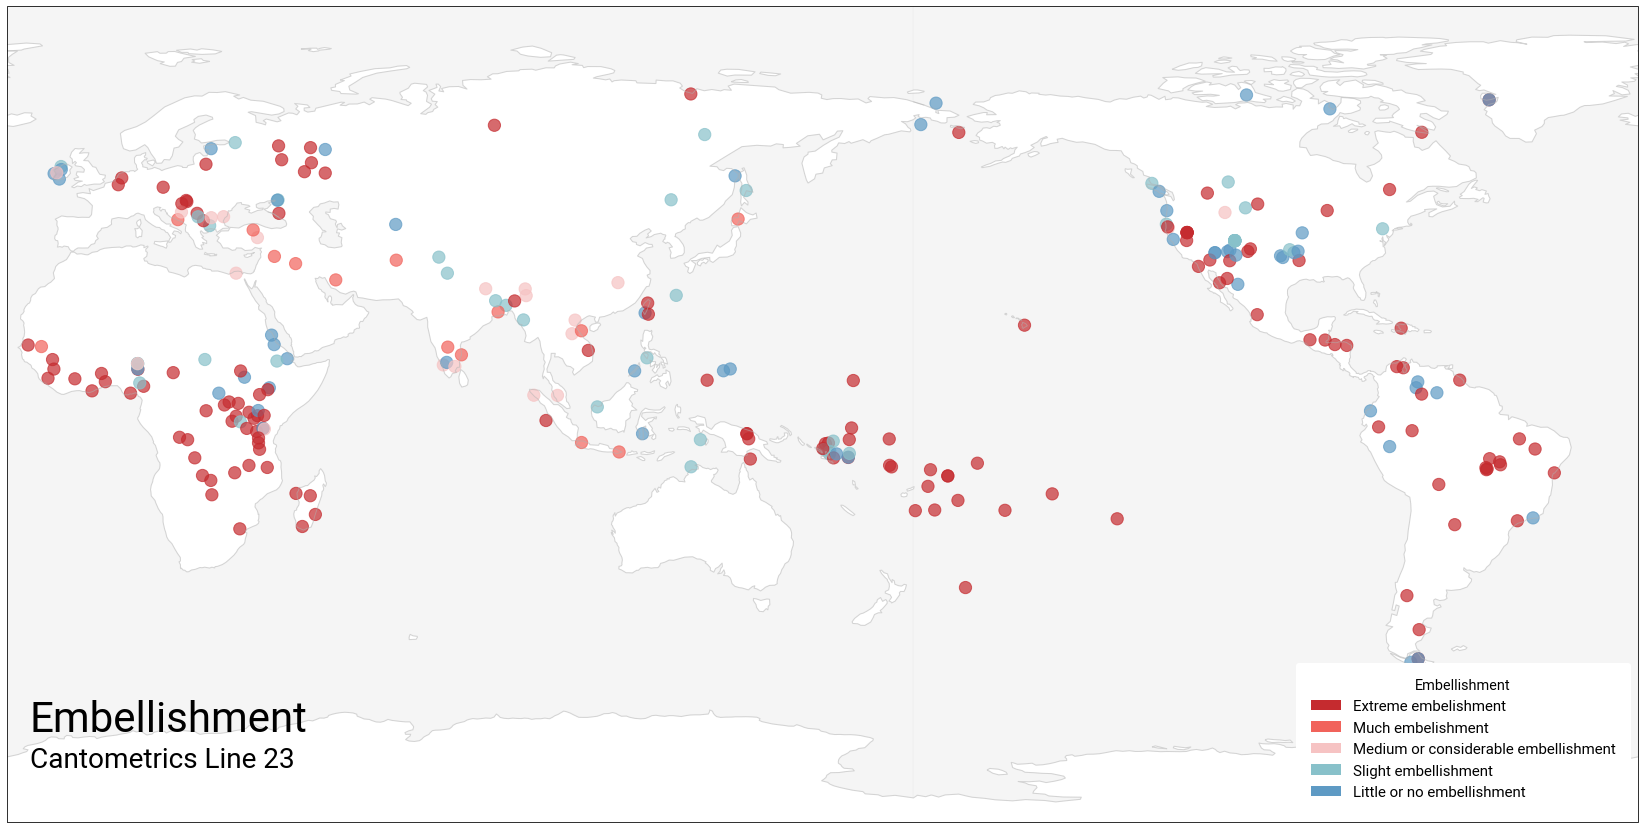

In [27]:
## Drop instances where there is no reading
embellishment = ea[ea.line_23 != 0]

## Map parameters
CENTRAL_LONGITUDE = 160.0
linenum = 23
vname = "Embellishment"
font_family = "Roboto"
alpha = 0.7

## output params
line_title = 'Cantometrics Line '+str(linenum)
column_name = 'line_'+str(linenum)
color_name = 'line'+str(linenum)+'_col'
color_map = {}
variable_name = vname
filename = './figs/'+vname.lower()+'_low.png'

## Project to co-ordinates
x,y = ([] for i in range(2))
for i, row in embellishment['Society_latitude'].iteritems():
    y.append(float(row))
for i, row in embellishment['Society_longitude'].iteritems():
    if float(row)+200 < 345:
        x.append(float(row)+200)
    else:
        x.append((float(row)+200)-345)
        
fig = plt.figure(figsize=(30,15))
projection=ccrs.PlateCarree(central_longitude=CENTRAL_LONGITUDE)
ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.set_global()
ax.text(-175, -70, variable_name, fontsize=42, fontfamily=font_family, color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily=font_family, color="Black")

colors = list(ea.line23_col.unique())
order = [0, 4, 1, 3, 2]
colors = [colors[i] for i in order]

scatter = ax.scatter(x,  y,
           c=embellishment[color_name], 
           alpha=alpha,
           marker='o',
           sizes=(150,150))

label_names = ["Extreme embelishment", "Much embelishment", "Medium or considerable embellishment", 
               "Slight embellishment", "Little or no embellishment"]

patch_1 = mpatches.Circle((0,0), radius=50, fc=colors[0], label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc=colors[1], label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc=colors[2], label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc=colors[3], label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc=colors[4], label=label_names[4])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 1,
                    edgecolor ="none",
                    fontsize=15,
                    title='Embellishment')


ax.add_feature(cfeature.OCEAN, alpha=.6, color="#EFEFEF") 

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family=font_family, weight='regular')
plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0)

## Plot EA Data - Stratification

In [28]:
ea.stratification_col.unique()

array(['#5E9AC4', '#F1635B', '#F6C3C3', '#C52B2F', '#88C1CA'],
      dtype=object)

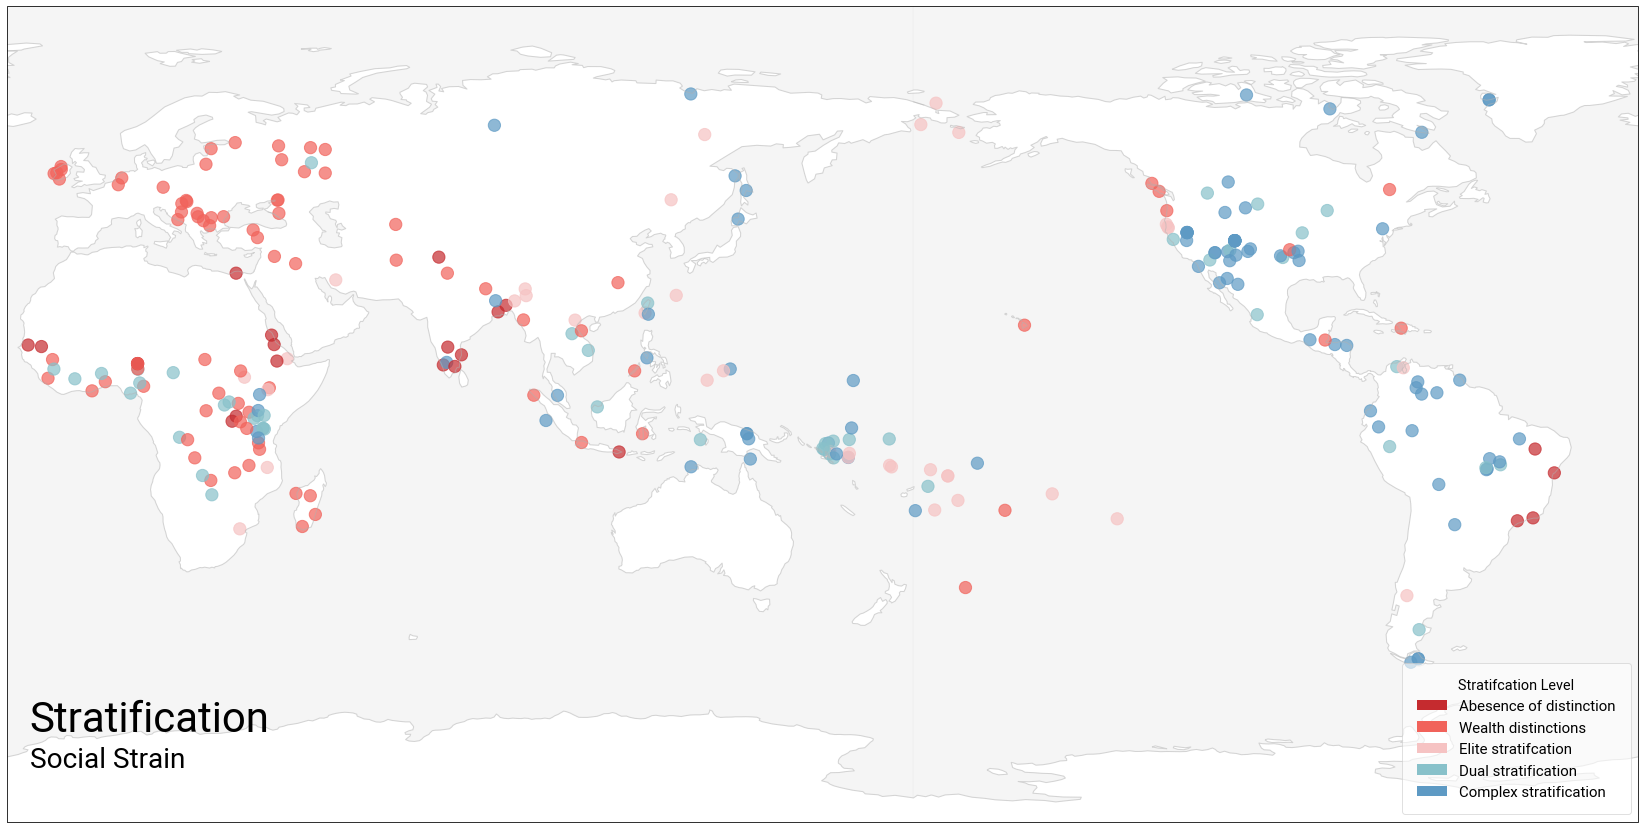

In [29]:
## Drop instances where there is no reading
stratification = ea[ea.line_23 != 0]


## Map parameters
CENTRAL_LONGITUDE = 160.0
vname = "Stratification"


## output params
line_title = 'Social Strain'
column_name = 'line_'+str(linenum)
color_name = 'stratification_col'
color_map = {}
variable_name = vname
filename = './figs/'+vname.lower()+'_low.png'
font_family = "Roboto"
weight =  'normal'
alpha = 0.7

## Project to co-ordinates
x,y = ([] for i in range(2))
for i, row in stratification['Society_latitude'].iteritems():
    y.append(float(row))
for i, row in stratification['Society_longitude'].iteritems():
    if float(row)+200 < 345:
        x.append(float(row)+200)
    else:
        x.append((float(row)+200)-345)
        
fig = plt.figure(figsize=(30,15))
projection=ccrs.PlateCarree(central_longitude=CENTRAL_LONGITUDE)
ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.set_global()
ax.text(-175, -70, variable_name, fontsize=42, fontfamily=font_family, color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily=font_family, color="Black")

scatter = ax.scatter(x,  y,
           c=stratification[color_name], 
           alpha=alpha,
           marker='o',
           sizes = (150,150))

label_names = ['Abesence of distinction','Wealth distinctions',
               'Elite stratifcation','Dual stratification','Complex stratification']

colors = list(ea.line23_col.unique())
order = [0, 4, 1, 3, 2]
colors = [colors[i] for i in order]

patch_1 = mpatches.Circle((0,0), radius=50, fc=colors[0], label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc=colors[1], label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc=colors[2], label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc=colors[3], label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc=colors[4], label=label_names[4])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 0.6,
                    fontsize=15,
                    title="Stratifcation Level")


ax.add_feature(cfeature.OCEAN, alpha=.6, color="#EFEFEF") 

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family=font_family, weight=weight)
plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0)